Noteable Trends:

- Strong correlation between average tumor volume and weight of a mouse while on the Capomulin drug regimen (correlation of .84)
- Capomulin and Ramicane have lowest two average tumor volume scores, and lowest two standard deviation scores
- Of the four most promising regimens infubinol has the highest average tumor volume and highest standard deviation

- Limitations: Capomulin and Ramicane were tested on more mice than the other drug regimens which could influence data points such as standard deviation 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as sts

In [2]:
# Finding csv Paths

path1 = '/Users/noahsuskin/Desktop/RU-JER-DATA-PT-04-2020-U-C/Homework/05-Matplotlib/Instructions/Pymaceuticals/data/Mouse_metadata.csv'

path2 = '/Users/noahsuskin/Desktop/RU-JER-DATA-PT-04-2020-U-C/Homework/05-Matplotlib/Instructions/Pymaceuticals/data/Study_results.csv'

In [3]:
# Reading in CSV paths

mouse_df  = pd.read_csv(path1)
results_df = pd.read_csv(path2)

In [4]:
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Merging dfs into one single df

merged_df = pd.merge(results_df, mouse_df, on='Mouse ID')
print(len(merged_df))
merged_df.head()

1893


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Getting rid of Duplicates pt. 1

# Duplicate df
duplicated_df = merged_df[merged_df.duplicated()]
duplicated_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.0,0,Propriva,Female,21,26


In [8]:
# Getting rid of Duplicates pt. 2

# Clean df
clean = merged_df.drop_duplicates(['Mouse ID', 'Timepoint'])
print(len(clean))
clean.head()

1888


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [9]:
# Summary Statistics table

# Mean
summary_df = merged_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).mean()

# Median
summary_df['Tumor Volume Median'] = merged_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).median()

# Variance
summary_df['Tumor Volume Variance'] = merged_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).var()

# Standard Deviation
summary_df['Tumor Volume Standard Deviation'] = merged_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).std()

# Standard Error
summary_df['Tumor Volume SEM'] = merged_df[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen']).sem()



# Formatting
summary_df = summary_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Mean'})

summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


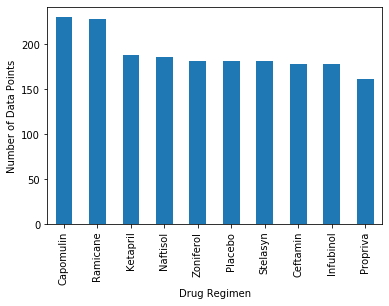

<Figure size 432x288 with 0 Axes>

In [10]:
# Pandas Bar Plots

# Creating dataframe which holds the values to be plotted
mice_count = merged_df.groupby(['Drug Regimen']).count()
mice_count.sort_values('Mouse ID', ascending=False, inplace=True)
mice_count = mice_count['Mouse ID']
mice_count

# Plotting the values using pandas plot method
mice_plot = mice_count.plot(kind='bar')
plt.ylabel('Number of Data Points')
plt.show()
plt.tight_layout()

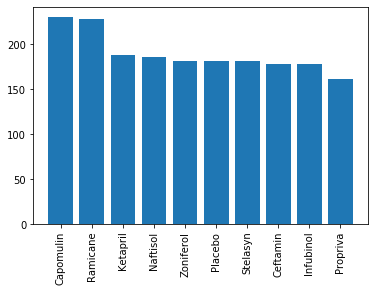

<Figure size 432x288 with 0 Axes>

In [11]:
# Matplotlib Bar Plots 

# Using the same df from previous code block to create the df we want to plot
mice_count

# Using matplotlib to plot points

# Creating x and y axis
x = np.arange(len(mice_count))
y = mice_count.values

# creating the labels for the x axis
x_labels = mice_count.reset_index()
x_labels = x_labels['Drug Regimen']

# plotting using matplotlib
ax = plt.bar(x, y)
plt.xticks(x, x_labels, rotation=90)
plt.show()
plt.tight_layout()

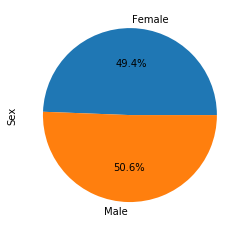

In [12]:
# Pandas Pie Chart

# Creating df to plot values
sex_count = merged_df.groupby('Sex')['Mouse ID'].count()

# Plotting using Pandas plot
pie_plot = sex_count.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()


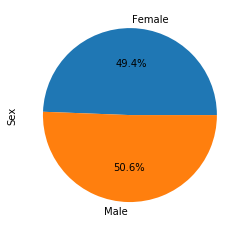

In [13]:
# Matplotlib Pie Chart

# Using previous defined df for values to plot
sex_count

# Setting values to be plotted
plot_values = sex_count.values
plot_labels = sex_count.index

# Plotting using matplotlib
plt.pie(plot_values, autopct='%1.1f%%', labels=plot_labels)
plt.ylabel('Sex')
plt.show()

In [14]:
# Box Plots

# Creating df with latest timepoint for each mouse
timepoint_df = merged_df.groupby(['Mouse ID'])['Timepoint'].max()
timepoint_df.reset_index()
final_tumor_vol_df = pd.merge(timepoint_df, merged_df, how='left', on=['Mouse ID', 'Timepoint'])


# Capomulin df
Capomulin_vol_df = final_tumor_vol_df[final_tumor_vol_df['Drug Regimen'] == 'Capomulin']
Capomulin_vol_df = Capomulin_vol_df['Tumor Volume (mm3)']

# Calculating Quartiles and IQR
Capomulin_quartiles = Capomulin_vol_df.quantile([.25, .5, .75])
Capomulin_lowerq = Capomulin_quartiles[.25]
Capomulin_upperq = Capomulin_quartiles[.75]
Capomulin_median = Capomulin_quartiles[.5]
Capomulin_IQR = Capomulin_upperq - Capomulin_lowerq

# Outlier computations
Capomulin_lowerb = Capomulin_lowerq - (1.5 * Capomulin_IQR)
Capomulin_upperb = Capomulin_upperq + (1.5 * Capomulin_IQR)

# Creating Outlier DF
outlier_df = Capomulin_vol_df.reset_index()
outlier_df = outlier_df[(outlier_df['Tumor Volume (mm3)'] > Capomulin_upperb) | (outlier_df['Tumor Volume (mm3)'] < Capomulin_lowerb)]

# Counting the Number of Outliers in the df
Capomulin_outlier_count = len(outlier_df)
print(f"Capomulin has {Capomulin_outlier_count} outliers")

Capomulin has 0 outliers


In [15]:
# Box Plots
# Ramicane DF

Ramicane_vol_df = final_tumor_vol_df[final_tumor_vol_df['Drug Regimen'] == 'Ramicane']
Ramicane_vol_df = Ramicane_vol_df['Tumor Volume (mm3)']

# Calculating Quartiles and IQR

Ramicane_quartiles = Ramicane_vol_df.quantile([.25, .5, .75])
Ramicane_lowerq = Ramicane_quartiles[.25]
Ramicane_upperq = Ramicane_quartiles[.75]
Ramicane_median = Ramicane_quartiles[.5]
Ramicane_IQR = Ramicane_upperq - Ramicane_lowerq

# Outlier computations
Ramicane_lowerb = Ramicane_lowerq - (1.5 * Ramicane_IQR)
Ramicane_upperb = Ramicane_upperq + (1.5 * Ramicane_IQR)

# Creating Outlier DF
Ramicane_outlier_df = Ramicane_vol_df.reset_index()
Ramicane_outlier_df = Ramicane_outlier_df[(Ramicane_outlier_df['Tumor Volume (mm3)'] > Ramicane_upperb) | (Ramicane_outlier_df['Tumor Volume (mm3)'] < Ramicane_lowerb)]

# Counting the Number of Outliers in the df
Ramicane_outlier_count = len(Ramicane_outlier_df)
print(f"Ramicane has {Ramicane_outlier_count} outliers")

Ramicane has 0 outliers


In [16]:
# Box Plots
# Infubinol DF

Infubinol_vol_df = final_tumor_vol_df[final_tumor_vol_df['Drug Regimen'] == 'Infubinol']
Infubinol_vol_df = Infubinol_vol_df['Tumor Volume (mm3)']

# Calculating Quartiles and IQR

Infubinol_quartiles = Infubinol_vol_df.quantile([.25, .5, .75])
Infubinol_lowerq = Infubinol_quartiles[.25]
Infubinol_upperq = Infubinol_quartiles[.75]
Infubinol_median = Infubinol_quartiles[.5]
Infubinol_IQR = Infubinol_upperq - Infubinol_lowerq

# Outlier computations
Infubinol_lowerb = Infubinol_lowerq - (1.5 * Infubinol_IQR)
Infubinol_upperb = Infubinol_upperq + (1.5 * Infubinol_IQR)


# Creating Outlier DF
Infubinol_outlier_df = Infubinol_vol_df.reset_index()
Infubinol_outlier_df = Infubinol_outlier_df[(Infubinol_outlier_df['Tumor Volume (mm3)'] > Infubinol_upperb) | (Infubinol_outlier_df['Tumor Volume (mm3)'] < Infubinol_lowerb)]


# Counting the Number of Outliers in the df
Infubinol_outlier_count = len(Infubinol_outlier_df)
print(f"Infubinol has {Infubinol_outlier_count} outliers")

Infubinol has 1 outliers


In [17]:
# Box Plots
# Ceftamin DF

Ceftamin_vol_df = final_tumor_vol_df[final_tumor_vol_df['Drug Regimen'] == 'Ceftamin']
Ceftamin_vol_df = Ceftamin_vol_df['Tumor Volume (mm3)']

# Calculating Quartiles and IQR

Ceftamin_quartiles = Ceftamin_vol_df.quantile([.25, .5, .75])
Ceftamin_lowerq = Ceftamin_quartiles[.25]
Ceftamin_upperq = Ceftamin_quartiles[.75]
Ceftamin_median = Ceftamin_quartiles[.5]
Ceftamin_IQR = Ceftamin_upperq - Ceftamin_lowerq

# Outlier computations
Ceftamin_lowerb = Ceftamin_lowerq - (1.5 * Ceftamin_IQR)
Ceftamin_upperb = Ceftamin_upperq + (1.5 * Ceftamin_IQR)


# Creating Outlier DF
Ceftamin_outlier_df = Ceftamin_vol_df.reset_index()
Ceftamin_outlier_df = Ceftamin_outlier_df[(Ceftamin_outlier_df['Tumor Volume (mm3)'] > Ceftamin_upperb) | (Ceftamin_outlier_df['Tumor Volume (mm3)'] < Ceftamin_lowerb)]

# Counting the Number of Outliers in the df
Ceftamin_outlier_count = len(Ceftamin_outlier_df)
print(f"Ceftamin has {Ceftamin_outlier_count} outliers")

Ceftamin has 0 outliers


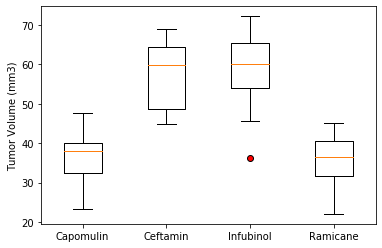

In [18]:
# Box Plots

# Creating the df with points to plot
full_df = pd.DataFrame()
full_df['Capomulin'] = Capomulin_vol_df.values
full_df['Ramicane'] = Ramicane_vol_df.values
full_df['Infubinol'] = Infubinol_vol_df.values
full_df['Ceftamin'] = Ceftamin_vol_df.values
full_df.reset_index(inplace=True)
full_df = full_df[full_df.columns.difference(['index'])]


# Plotting
# Changing outlier markers
outlier_marker = dict(markerfacecolor='r', marker='o')
plt.boxplot(full_df.values, labels=full_df.columns, flierprops=outlier_marker)
plt.ylabel('Tumor Volume (mm3)')

plt.show()

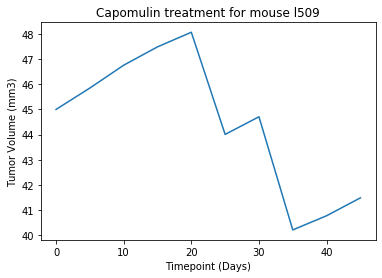

In [19]:
# Line Plot

# figuring out which mouse we want to plot
mouse_id = 'l509'

# Creating the capomulin df
lineplot_capomulin_df = merged_df[(merged_df['Drug Regimen'] == 'Capomulin') & (merged_df['Mouse ID'] == mouse_id)]

# Creating x and y axis
x = lineplot_capomulin_df['Timepoint']
y = lineplot_capomulin_df['Tumor Volume (mm3)']

# Plotting
plt.plot(x, y)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"Capomulin treatment for mouse {mouse_id}")
plt.show()

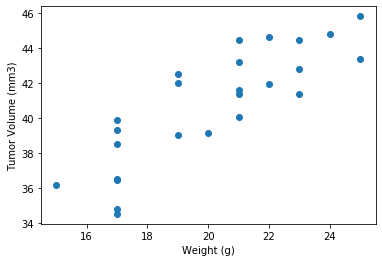

In [20]:
# Scatter Plot

# Creating Capomulin df
scatter_df = merged_df[merged_df['Drug Regimen'] == 'Capomulin']
scatter_df = scatter_df.groupby(['Mouse ID']).mean()
scatter_df = scatter_df[['Tumor Volume (mm3)', 'Weight (g)']]

# Creating x and y axis
x = scatter_df['Weight (g)']
y = scatter_df['Tumor Volume (mm3)']

# Plotting
plt.scatter(x, y)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [21]:
# Correlation and Regression

# Finding Correlation
# Using x and y from previous code block
correlation = round((sts.pearsonr(x, y)[0]), 2)
print( f"The correlation between mouse weight and the average tumor volume is {correlation}")

The correlation between mouse weight and the average tumor volume is 0.84


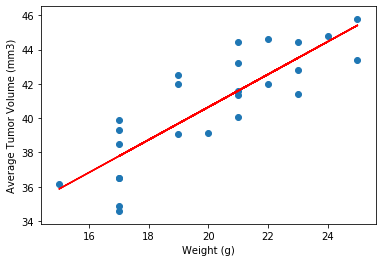

In [22]:
# Plot Regression

# Using x and y from previous code block
# Create linear regression variables
tumor_vol_slope, tumor_vol_int, tumor_vol_r, tumor_vol_p, tumor_vol_std_err = sts.linregress(x, y)

# Create regression line values
regression_fit = tumor_vol_slope * x + tumor_vol_int

# Plot regression line and scatter plot
plt.plot(x ,regression_fit, c='r')
plt.scatter(x,y)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

